# Two Hand Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("3600samples/twohand.csv")
limit = len(data)

In [6]:
button_dict = {}
button_error = {}
for i in range(1,36):
    button_dict[i] = []
    button_error[i] = 0
for i in data.index:
    category = data.loc[i, 'Category(0:button set 1:button pressed)']
    y=-1
    x=-1
    if category == 0 and i+1<limit: 
        next_category = data.loc[i+1, 'Category(0:button set 1:button pressed)']
        if next_category == 1:
            delay_mills = data.loc[i+1, 'time'] - data.loc[i, 'time']
            
            if data.loc[i,'gazeY'] == 212:
                y=0
            elif data.loc[i,'gazeY'] == 572:
                y=1
            elif data.loc[i,'gazeY'] == 932:
                y=2
            elif data.loc[i,'gazeY'] == 1292:
                y=3
            elif data.loc[i,'gazeY'] == 1652:
                y=4
            elif data.loc[i,'gazeY'] == 2012:
                y=5
            elif data.loc[i,'gazeY'] == 2372:
                y=6
            
            if data.loc[i,'gazeX'] == 165:
                x=1
            elif data.loc[i,'gazeX'] == 442:
                x=2
            elif data.loc[i,'gazeX'] == 719:
                x=3
            elif data.loc[i,'gazeX'] == 996:
                x=4
            elif data.loc[i,'gazeX'] == 1273:
                x=5
            
            button_num = y*5+x
            if delay_mills > 0 and delay_mills < 1000:
                print(str(i//2)+"th touch delay: "+str(delay_mills/1000)+" on button "+str(button_num))
                button_dict[button_num].append(delay_mills/1000)
            else:
                print(str(i//2)+"th touch data is not valid"+" on button "+str(button_num))
                button_error[button_num]+=1

0th touch delay: 0.516 on button 5
1th touch delay: 0.522 on button 17
2th touch delay: 0.484 on button 28
3th touch delay: 0.493 on button 35
4th touch delay: 0.535 on button 17
5th touch delay: 0.575 on button 34
6th touch data is not valid on button 4
7th touch delay: 0.602 on button 2
8th touch delay: 0.526 on button 4
9th touch delay: 0.532 on button 2
10th touch delay: 0.574 on button 16
11th touch delay: 0.537 on button 4
12th touch delay: 0.515 on button 22
13th touch data is not valid on button 34
14th touch delay: 0.615 on button 7
15th touch delay: 0.601 on button 6
16th touch delay: 0.502 on button 15
17th touch delay: 0.581 on button 7
18th touch delay: 0.582 on button 6
19th touch delay: 0.465 on button 15
20th touch delay: 0.437 on button 13
21th touch delay: 0.587 on button 13
22th touch delay: 0.524 on button 28
23th touch delay: 0.503 on button 31
24th touch delay: 0.588 on button 31
25th touch delay: 0.415 on button 33
26th touch delay: 0.609 on button 5
27th touch d

In [7]:
for i in range(1,36):
    print(str(i)+"th button:")
    print("delay: "+str(button_dict[i]))
    print("error: "+str(button_error[i]))
    print(" ")

1th button:
delay: [0.642, 0.676, 0.69, 0.596, 0.642, 0.694]
error: 1
 
2th button:
delay: [0.602, 0.532, 0.578, 0.58, 0.736, 0.615, 0.627, 0.82, 0.593, 0.681, 0.685, 0.636, 0.594, 0.634]
error: 2
 
3th button:
delay: [0.534, 0.55, 0.609, 0.584, 0.634, 0.576, 0.535, 0.571, 0.518]
error: 1
 
4th button:
delay: [0.526, 0.537, 0.501, 0.506, 0.556, 0.489, 0.608, 0.604, 0.516, 0.559, 0.614, 0.585, 0.565, 0.523, 0.624]
error: 1
 
5th button:
delay: [0.516, 0.609, 0.59, 0.534, 0.59, 0.589, 0.562, 0.49, 0.784, 0.535]
error: 0
 
6th button:
delay: [0.601, 0.582, 0.599, 0.765, 0.625, 0.602, 0.563, 0.61, 0.601, 0.575, 0.565]
error: 2
 
7th button:
delay: [0.615, 0.581, 0.583, 0.589, 0.61, 0.565, 0.483, 0.465, 0.542, 0.549, 0.528]
error: 1
 
8th button:
delay: [0.49, 0.496, 0.472, 0.44, 0.494, 0.751, 0.532, 0.498, 0.584]
error: 0
 
9th button:
delay: [0.458, 0.499, 0.483, 0.458, 0.585, 0.451, 0.478, 0.468, 0.463]
error: 0
 
10th button:
delay: [0.567, 0.473, 0.511, 0.583, 0.446, 0.492, 0.842, 0.65

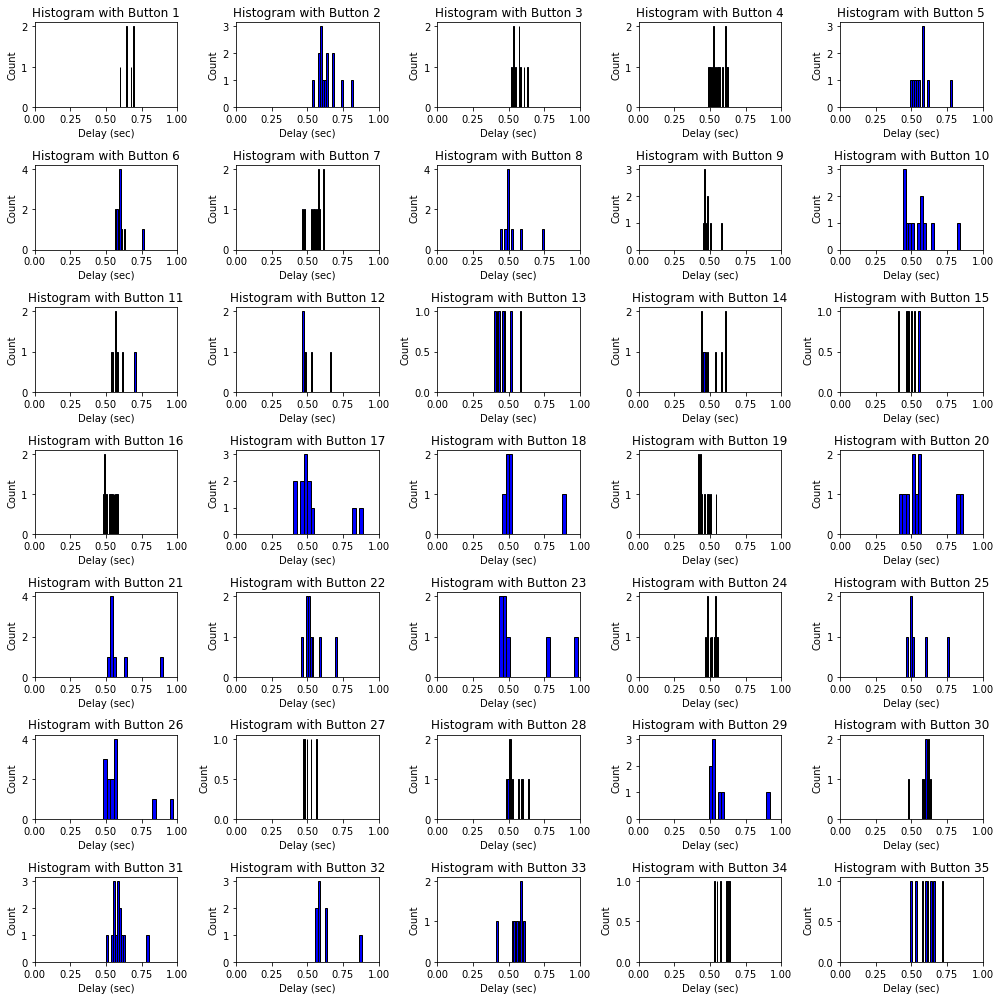

In [8]:
fig,ax = plt.subplots(7, 5, figsize=(14,14))

for i in range(1,36):
    bin_width = 0.05
    
    plt.subplot(7, 5, i )
    ax=plt.gca()
    # matplotlib histogram
    ax.hist(button_dict[i], color = 'blue', edgecolor = 'black', bins = int(1/bin_width))

    # Add labels
#     ax.set_title('Histogram with Button %d' % i, size = 30)
#     ax.set_xlabel('Count', size = 22)
#     ax.set_ylabel('Delay (sec)', size = 22)
    ax.set_title('Histogram with Button %d' % i)
    ax.set_ylabel('Count')
    ax.set_xlabel('Delay (sec)')
    ax.set_xlim([0,1])
plt.tight_layout()
plt.show()

In [9]:
mean_list=[]
for i in range(1,36):
    arr = np.array(button_dict[i])
    print("Button "+str(i)+" mean: "+str(np.mean(arr)))
    mean_list.append(np.mean(arr))

Button 1 mean: 0.6566666666666666
Button 2 mean: 0.6366428571428572
Button 3 mean: 0.5678888888888889
Button 4 mean: 0.5542
Button 5 mean: 0.5799000000000001
Button 6 mean: 0.6079999999999999
Button 7 mean: 0.5554545454545454
Button 8 mean: 0.5285555555555556
Button 9 mean: 0.48255555555555557
Button 10 mean: 0.5470833333333334
Button 11 mean: 0.5875
Button 12 mean: 0.5163333333333334
Button 13 mean: 0.4711428571428571
Button 14 mean: 0.5085999999999999
Button 15 mean: 0.4872857142857144
Button 16 mean: 0.5308461538461539
Button 17 mean: 0.5413333333333333
Button 18 mean: 0.5608333333333334
Button 19 mean: 0.46154545454545454
Button 20 mean: 0.5703000000000001
Button 21 mean: 0.5920000000000001
Button 22 mean: 0.5376666666666668
Button 23 mean: 0.5811428571428571
Button 24 mean: 0.5135833333333334
Button 25 mean: 0.5569999999999999
Button 26 mean: 0.5873076923076923
Button 27 mean: 0.5048333333333334
Button 28 mean: 0.5388181818181819
Button 29 mean: 0.579875
Button 30 mean: 0.590125
B

In [10]:
len(mean_list)

35

# My 3d plot

In [7]:
X = list(range(1,6))
Y = list(range(0,7))
Z = mean_list

arr_data=[]
for i in X:
    for j in Y:
        arr_data.append([i,j+1,mean_list[j*5+i-1]])
arr_data = np.array(arr_data)

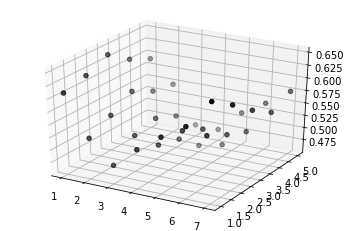

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style

# style.use('fivethirtyeight')
Y = arr_data[:,0]
X = arr_data[:,1]
Z = arr_data[:,2]
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.scatter(X, Y, Z, color='black')
plt.show()

In [9]:
x=[]
y=[]
z=[]
for i in range(0,7):
    x.append(list(range(1,6)))
x = np.array(x)
x

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

In [10]:
for i in reversed(range(0,7)):
    y.append([i]*5)
y = np.array(y)
y

array([[6, 6, 6, 6, 6],
       [5, 5, 5, 5, 5],
       [4, 4, 4, 4, 4],
       [3, 3, 3, 3, 3],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0]])

In [11]:
for i in range(0,7):
    temp_list=[]
    for j in range(1,6):
        temp_list.append(mean_list[i*5+j-1])
    z.append(temp_list)
z = np.array(z)
z

array([[0.61009091, 0.62169388, 0.64110345, 0.61165385, 0.59210204],
       [0.53075439, 0.5525    , 0.57751163, 0.55594828, 0.54803226],
       [0.48602174, 0.52127027, 0.53225532, 0.51379545, 0.47178125],
       [0.5267551 , 0.51159615, 0.49918519, 0.46147368, 0.47113793],
       [0.56084906, 0.54930612, 0.52871429, 0.47275   , 0.51480488],
       [0.59012766, 0.54876087, 0.52665455, 0.50886047, 0.54339344],
       [0.6457551 , 0.61681132, 0.58384314, 0.55665455, 0.57591071]])

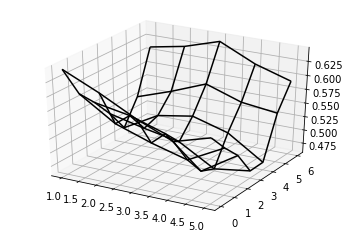

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_wireframe(x,y,z, color='black')

# Filling in intervals

In [13]:
interval = 0.2

x_interp=np.arange(1,5+interval,interval)
z_interp=[]
for i in range(0,7):
    z_interp.append(np.interp(x_interp,x[i],z[i]))
df = pd.DataFrame(z_interp)
z_transpose_interp=[]
y_interp=np.arange(1,7+interval,interval)
x_interp

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
       3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ])

In [14]:
y_interp

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
       3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6, 5.8, 6. ,
       6.2, 6.4, 6.6, 6.8, 7. ])

In [15]:
for i in range(0,len(x_interp)):
    z_transpose_interp.append(np.interp(y_interp,[1,2,3,4,5,6,7],list(df[i])))
z_transpose_interp = np.asarray(z_transpose_interp)
df = pd.DataFrame(z_transpose_interp)
z_transpose_interp = np.asarray(df.transpose())
df = pd.DataFrame(z_transpose_interp)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.610091,0.612412,0.614732,0.617053,0.619373,0.621694,0.625576,0.629458,0.633340,0.637222,...,0.635214,0.629324,0.623434,0.617544,0.611654,0.607743,0.603833,0.599923,0.596012,0.592102
1,0.594224,0.596950,0.599676,0.602403,0.605129,0.607855,0.611961,0.616067,0.620173,0.624279,...,0.622811,0.617236,0.611662,0.606087,0.600513,0.597068,0.593623,0.590178,0.586733,0.583288
2,0.578356,0.581488,0.584620,0.587752,0.590884,0.594016,0.598346,0.602676,0.607007,0.611337,...,0.610408,0.605149,0.599890,0.594631,0.589372,0.586392,0.583413,0.580433,0.577454,0.574474
3,0.562489,0.566027,0.569564,0.573102,0.576640,0.580178,0.584732,0.589286,0.593840,0.598394,...,0.598005,0.593061,0.588118,0.583174,0.578231,0.575716,0.573202,0.570688,0.568174,0.565660
4,0.546622,0.550565,0.554509,0.558452,0.562395,0.566339,0.571117,0.575895,0.580674,0.585452,...,0.585602,0.580974,0.576346,0.571718,0.567089,0.565041,0.562992,0.560943,0.558895,0.556846
5,0.530754,0.535104,0.539453,0.543802,0.548151,0.552500,0.557502,0.562505,0.567507,0.572509,...,0.573199,0.568886,0.564574,0.560261,0.555948,0.554365,0.552782,0.551199,0.549615,0.548032
6,0.521808,0.526697,0.531586,0.536476,0.541365,0.546254,0.550695,0.555137,0.559578,0.564019,...,0.564272,0.560083,0.555895,0.551706,0.547518,0.544571,0.541623,0.538676,0.535729,0.532782
7,0.512861,0.518291,0.523720,0.529149,0.534579,0.540008,0.543888,0.547769,0.551649,0.555529,...,0.555345,0.551280,0.547216,0.543152,0.539087,0.534776,0.530465,0.526154,0.521843,0.517532
8,0.503915,0.509884,0.515854,0.521823,0.527793,0.533762,0.537081,0.540400,0.543720,0.547039,...,0.546418,0.542477,0.538537,0.534597,0.530657,0.524982,0.519307,0.513632,0.507957,0.502282
9,0.494968,0.501478,0.507987,0.514497,0.521007,0.527516,0.530274,0.533032,0.535790,0.538549,...,0.537490,0.533674,0.529858,0.526042,0.522226,0.515187,0.508148,0.501109,0.494070,0.487031


In [16]:
x_interp_arr = []
for i in range(len(y_interp)):
    x_interp_arr.append(x_interp.tolist())
x_interp_arr = np.array(x_interp_arr)
df = pd.DataFrame(x_interp_arr)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
1,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
2,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
3,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
4,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
5,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
6,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
7,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
9,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0


In [17]:
y_interp_arr = []
for i in range(len(y_interp)):
    y_interp_arr.append([y_interp[-(i+1)]]*len(x_interp))
y_interp_arr = np.array(y_interp_arr)
df = pd.DataFrame(y_interp_arr)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
1,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,...,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8
2,6.6,6.6,6.6,6.6,6.6,6.6,6.6,6.6,6.6,6.6,...,6.6,6.6,6.6,6.6,6.6,6.6,6.6,6.6,6.6,6.6
3,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.4,...,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.4
4,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2,...,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2
5,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
6,5.8,5.8,5.8,5.8,5.8,5.8,5.8,5.8,5.8,5.8,...,5.8,5.8,5.8,5.8,5.8,5.8,5.8,5.8,5.8,5.8
7,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,...,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6
8,5.4,5.4,5.4,5.4,5.4,5.4,5.4,5.4,5.4,5.4,...,5.4,5.4,5.4,5.4,5.4,5.4,5.4,5.4,5.4,5.4
9,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2,...,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_wireframe(x_interp_arr,y_interp_arr,z_transpose_interp, color='blue')

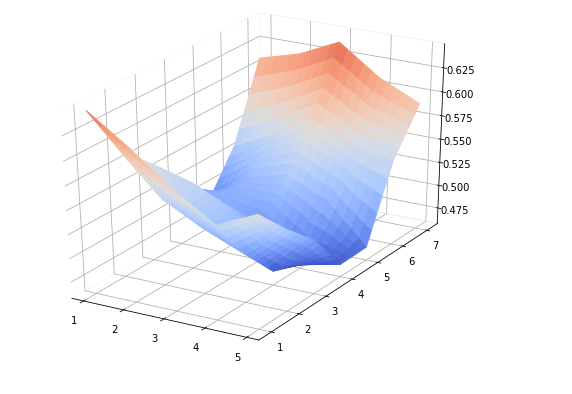

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')

norm = plt.Normalize(vmin=0.46, vmax=0.68)
colors = cm.coolwarm(norm(z_transpose_interp))
rcount, ccount, _ = colors.shape

# OUR ONE LINER ADDED HERE:
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.7, 1.2, 1, 1]))
surf = ax.plot_surface(x_interp_arr,y_interp_arr,z_transpose_interp, rcount=rcount, ccount=ccount,
                       facecolors=colors, shade=False)
#plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.coolwarm), ax=ax)

# ax.set_xlim(1,5)
# ax.set_ylim(1,7)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


plt.show()

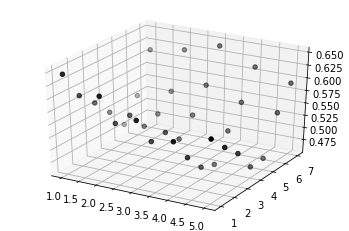

In [19]:
aX = list(range(1,6))
aY = list(range(0,7))
aZ = mean_list

arr_data=[]
for i in aX:
    for j in aY:
        arr_data.append([i,j+1,mean_list[j*5+i-1]])
arr_data = np.array(arr_data)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style

# style.use('fivethirtyeight')
aY = arr_data[:,0]
aX = arr_data[:,1].tolist()[::-1]
aZ = arr_data[:,2]
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.scatter(aY, aX, aZ, color='black')
plt.show()

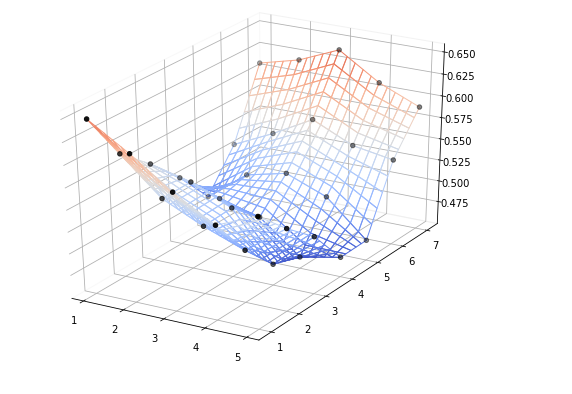

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')

norm = plt.Normalize(vmin=0.46, vmax=0.68)
colors = cm.coolwarm(norm(z_transpose_interp))
rcount, ccount, _ = colors.shape

# OUR ONE LINER ADDED HERE:
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.7, 1.2, 1, 1]))
surf = ax.plot_surface(x_interp_arr,y_interp_arr,z_transpose_interp, rcount=rcount, ccount=ccount,
                       facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))
#plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.coolwarm), ax=ax)
ax.scatter(aY,aX,aZ, color='black')

# ax.set_xlim(1,5)
# ax.set_ylim(1,7)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


plt.show()

In [21]:
y_interp_arr = []
for i in range(len(y_interp)):
    y_interp_arr.append([y_interp[i]]*len(x_interp))
y_interp_arr = np.array(y_interp_arr)
df = pd.DataFrame(y_interp_arr)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,...,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2
2,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,...,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4
3,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,...,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6
4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
5,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
6,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,...,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2
7,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,...,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4
8,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,...,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6
9,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,...,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8


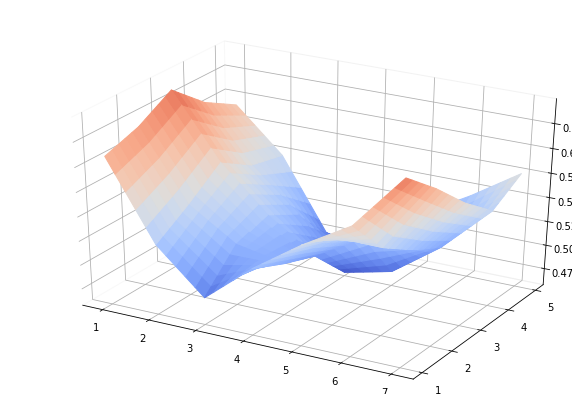

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')

norm = plt.Normalize(vmin=0.46, vmax=0.68)
colors = cm.coolwarm(norm(z_transpose_interp))
rcount, ccount, _ = colors.shape

# OUR ONE LINER ADDED HERE:
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.2, 0.9, 1, 1]))
surf = ax.plot_surface(y_interp_arr,x_interp_arr,z_transpose_interp, rcount=rcount, ccount=ccount,
                       facecolors=colors, shade=False)
#plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.coolwarm), ax=ax)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# ax.set_xlim(1,5)
# ax.set_ylim(1,7)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.set_axis_off()
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()


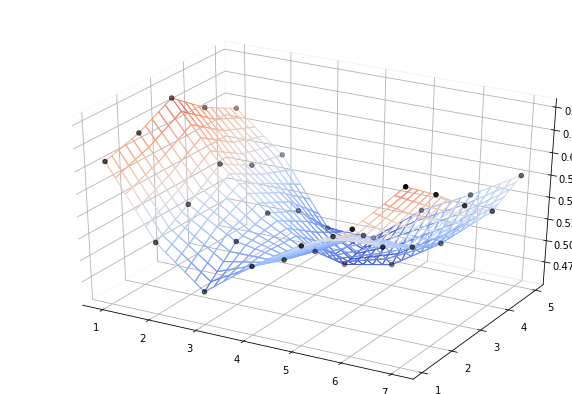

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')

norm = plt.Normalize(vmin=0.46, vmax=0.68)
colors = cm.coolwarm(norm(z_transpose_interp))
rcount, ccount, _ = colors.shape

# OUR ONE LINER ADDED HERE:
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.2, 0.9, 1, 1]))
surf = ax.plot_surface(y_interp_arr,x_interp_arr,z_transpose_interp, rcount=rcount, ccount=ccount,
                       facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))
#plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.coolwarm), ax=ax)
ax.scatter(X,Y,Z, color='black')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# ax.set_xlim(1,5)
# ax.set_ylim(1,7)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.set_axis_off()
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()


# Heatmap

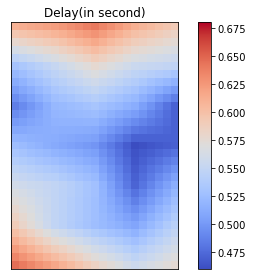

In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
# sphinx_gallery_thumbnail_number = 2

vegetables = y_interp_arr
farmers = x_interp_arr

fig, ax = plt.subplots()
#heatmap = ax.pcolor(z_transpose_interp, cmap=cm.coolwarm)
im = ax.imshow(z_transpose_interp,cmap=cm.coolwarm, vmin=0.46, vmax=0.68)
    
ax.set_xticklabels([0,1,2,3,4,5])
ax.set_yticklabels([0,1,2,3,4,5,6,7])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")
cbar = plt.colorbar(im)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.title('Delay(in second)')
fig.tight_layout()
plt.show()

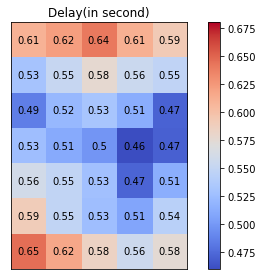

In [25]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
# sphinx_gallery_thumbnail_number = 2

vegetables = y_interp_arr
farmers = x_interp_arr

fig, ax = plt.subplots()
#heatmap = ax.pcolor(z_transpose_interp, cmap=cm.coolwarm)
im = ax.imshow(z,cmap=cm.coolwarm, vmin=0.46, vmax=0.68)
    
ax.set_xticklabels([0,1,2,3,4,5])
ax.set_yticklabels([0,1,2,3,4,5,6,7])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")
for i in range(7):
    for j in range(5):
        text = ax.text(j, i, round(z[i, j],2),
                       ha="center", va="center", color="black")
cbar = plt.colorbar(im)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.title('Delay(in second)')
fig.tight_layout()
plt.show()